Solución encontrada en la generación 4
Solución: [2, 5, 7, 0, 4, 6, 1, 3]
Conflictos: 0


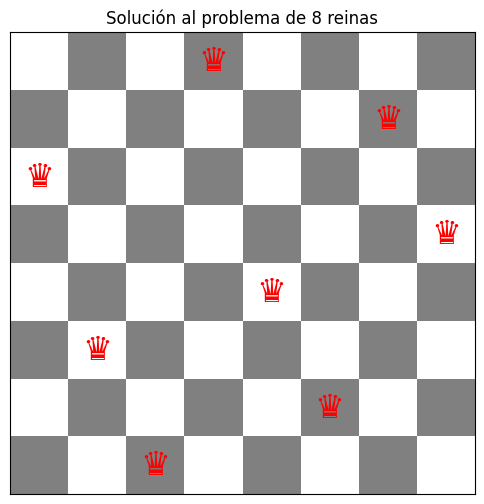

In [1]:
import matplotlib.pyplot as plt
import random

# Número de reinas
N = 8

# Crear un cromosoma (aleatoria)
def crear_individuo():
    individuo = list(range(N))
    random.shuffle(individuo)
    return individuo

# Evaluar número de conflictos en diagonales
def evaluar(individuo):
    conflictos = 0
    for i in range(N):
        for j in range(i + 1, N):
            if abs(individuo[i] - individuo[j]) == abs(i - j):
                conflictos += 1
    return conflictos

# Cruzar dos padres (cruce de orden)
def cruzar(p1, p2):
    a, b = sorted(random.sample(range(N), 2))
    hijo = [None] * N
    hijo[a:b] = p1[a:b]
    relleno = [gene for gene in p2 if gene not in hijo]
    pos = 0
    for i in range(N):
        if hijo[i] is None:
            hijo[i] = relleno[pos]
            pos += 1
    return hijo

# Mutación por intercambio
def mutar(individuo, prob=0.2):
    if random.random() < prob:
        a, b = random.sample(range(N), 2)
        individuo[a], individuo[b] = individuo[b], individuo[a]
    return individuo

# Algoritmo genético principal
def algoritmo_genetico(poblacion_size=100, generaciones=1000):
    poblacion = [crear_individuo() for _ in range(poblacion_size)]
    for gen in range(generaciones):
        poblacion.sort(key=evaluar)
        if evaluar(poblacion[0]) == 0:
            print(f"Solución encontrada en la generación {gen}")
            return poblacion[0]
        nueva_poblacion = poblacion[:10]  # elitismo
        while len(nueva_poblacion) < poblacion_size:
            padres = random.sample(poblacion[:50], 2)
            hijo = cruzar(padres[0], padres[1])
            hijo = mutar(hijo)
            nueva_poblacion.append(hijo)
        poblacion = nueva_poblacion
    return min(poblacion, key=evaluar)

# Visualización del tablero
def graficar_tablero(solucion):
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in range(N):
        for j in range(N):
            color = 'white' if (i + j) % 2 == 0 else 'gray'
            ax.add_patch(plt.Rectangle((j, N - 1 - i), 1, 1, facecolor=color))
    for col, row in enumerate(solucion):
        ax.text(col + 0.5, N - 1 - row + 0.5, '♛', ha='center', va='center', fontsize=24, color='red')
    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Solución al problema de {N} reinas")
    plt.grid(False)
    plt.show()

# Ejecutar el algoritmo y mostrar la solución
solucion = algoritmo_genetico()
print("Solución:", solucion)
print("Conflictos:", evaluar(solucion))
graficar_tablero(solucion)